In [ ]:
import tensorflow as tf
import numpy as np
import pickle
from matplotlib import pyplot as plt
from matplotlib.figure import Figure

Here we have imported Tensorflow and the tensorflow datasets which includes the MINST dataset.

In [ ]:
mnist = tf.keras.datasets.mnist
new_size = (14,14)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.reshape(x_train, (60000,28,28,1))
x_test = tf.reshape(x_test, (10000,28,28,1))
x_train = tf.image.resize(x_train,new_size).numpy()
x_test = tf.image.resize(x_test,new_size).numpy()
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


We imported the MINST data set, automatically splitting it into test and training set and further shuffing the data randomly.

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.layers import Reshape, Dropout, Conv2D
from tensorflow.keras.layers import Concatenate, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
width = 14
height = 14

In [ ]:
shape = (height,width,1)
input_img = Input(shape=shape)
encoded = Flatten()(input_img)
encoded_a = Dense(144, activation='relu')(encoded)
encoded = Dropout(0.1)(encoded_a)
encoded_b = Dense(64, activation='relu')(encoded)
encoded = Dropout(0.1)(encoded_b)
output = Dense(10)(encoded)

model = Model(input_img, output)

model_a = Model(input_img,encoded_a)
model_b = Model(input_img,encoded_b)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=15)


Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3359 - accuracy: 0.9021
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1460 - accuracy: 0.9559
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1108 - accuracy: 0.9659
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0914 - accuracy: 0.9723
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0785 - accuracy: 0.9753
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0690 - accuracy: 0.9778
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0627 - accuracy: 0.9799
Epoch 8/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0559 - accuracy: 0.9823
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0512 - accuracy: 0.9833
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.050

In [ ]:
model(x_train[5].reshape(1,14,14)).numpy()

array([[ -6.0577774 ,  -3.5612142 ,  12.439627  ,   1.705483  ,
         -6.1713724 , -12.045273  , -11.356764  ,   0.31776983,
         -2.9844756 , -10.396109  ]], dtype=float32)

In [ ]:
def plot_model(data):
  f, axarr = plt.subplots(4)
  axarr[0].imshow(data)
  axarr[1].imshow(model_a(data.reshape(1,14,14)).numpy().reshape(12,12))
  axarr[2].imshow(model_b(data.reshape(1,14,14)).numpy().reshape(8,8))
  axarr[3].imshow(model(data.reshape(1,14,14)).numpy())


In [ ]:
def renormalize(a):
  max_a = np.max(a)
  min_a = np.min(a)
  a = (a - min_a)/(max_a-min_a)
  return(a)
def save_model(data, filename):
  l = []
  n_layers = 4
  l.append(n_layers)
  l.append(np.array(data))
  l.append(renormalize(model_a(data.reshape(1,14,14)).numpy().reshape(12,12)))
  l.append(renormalize(model_b(data.reshape(1,14,14)).numpy().reshape(8,8)))
  l.append(renormalize(model(data.reshape(1,14,14)).numpy()))
  f = open(filename, "wb")
  pickle.dump(l, f)
  f.close()

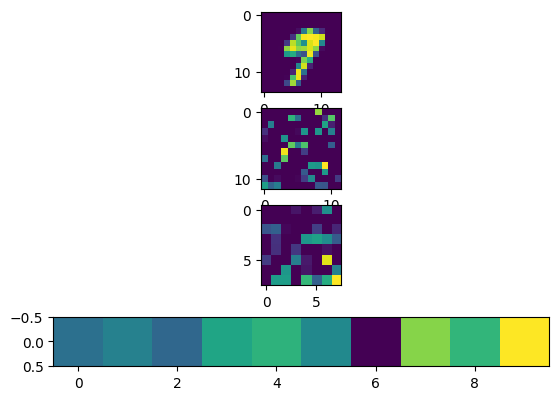

In [ ]:
plot_model(x_test[20])

In [ ]:
save_model(x_test[20],"x-test-20-9.pk")

In [ ]:
x_test_resized.shape

(14, 14, 28)

In [ ]:
x_train.shape

(60000, 14, 14, 1)

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.5 MB/s eta 

In [ ]:
def gradio_helper(img):
  img = np.array(img)
  img = img.reshape(1,28,28,1)
  img = img / 255.
  img = tf.image.resize(img,(14,14))
  x = model(img).numpy().reshape(10)
  x_min = min(x)
  x_max = max(x)
  x = x-x_min
  x = x/(x_max-x_min)

  labels = {"zero":float(x[0]),
            "one": float(x[1]),
            "two": float(x[2]),
            "three":float(x[3]),
            "four":float(x[4]),
            "five":float(x[5]),
            "six":float(x[6]),
            "seven":float(x[7]),
            "eight":float(x[8]),
            "nine":float(x[9])}
  return (labels)
  #text = "0: " +str(x[0])+ "\n1: "+str(x[1])+"\n2: "+str(x[2])+" 3: "+str(x[3])+" 4: "+str(x[4])+" 5: "+str(x[5])+ " 6: "+str(x[6])+" 7: "+str(x[7])+" 8: "+str(x[8])+" 9: "+str(x[9])
  #return (text)

In [ ]:
import gradio

gradio.Interface(gradio_helper, "sketchpad", "label").launch(share=True,debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://2f6277788b3236bfdc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


In [ ]:

for i in range(len(y_test)):
  if y_test[i] == 9:
    print(i)



61
84
110
128
134
146
177
179
181
184
226
232
233
242
257
260
266
268
277
290
299
338
344
355
373
374
391
401
403
429
431
435
436
458
465
466
470
474
486
495
520
527
538
542
543
553
563
572
580
582
591
596
601
603
606
621
631
641
655
664
685
691
693
709
714
718
761
781
787
793
800
805
806
839
844
864
872
876
877
878
879
899
914
915
936
947
961
983
998
1007
1018
1026
1029
1033
1052
1068
1074
1093
1101
1118
1120
1124
1125
1149
1170
1185
1198
1200
1202
1219
1225
1229
1234
1248
1249
1259
1267
1268
1286
1287
1312
1319
1320
1324
1325
1353
1364
1371
1389
1394
1398
1415
1425
1433
1441
1443
1464
1470
1474
1499
1502
1523
1524
1530
1541
1556
1560
1562
1567
1568
1572
1573
1583
1584
1613
1651
1663
1664
1669
1675
1686
1687
1694
1702
1717
1719
1740
1756
1758
1759
1774
1782
1813
1823
1827
1850
1855
1859
1877
1878
1882
1893
1899
1912
1914
1942
1946
1955
1960
1961
1968
1973
2004
2038
2050
2052
2056
2065
2093
2099
2102
2107
2111
2119
2121
2142
2146
2149
2152
2163
2168
2172
2177
2179
2203
2208
2211
2213
2

In [ ]:
help(np.where)

Help on function where in module numpy:

where(...)
    where(condition, [x, y], /)
    
    Return elements chosen from `x` or `y` depending on `condition`.
    
    .. note::
        When only `condition` is provided, this function is a shorthand for
        ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
        preferred, as it behaves correctly for subclasses. The rest of this
        documentation covers only the case where all three arguments are
        provided.
    
    Parameters
    ----------
    condition : array_like, bool
        Where True, yield `x`, otherwise yield `y`.
    x, y : array_like
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray
        An array with elements from `x` where `condition` is True, and elements
        from `y` elsewhere.
    
    See Also
    --------
    choose
    nonzero : The function that is called when x an